## EDA and Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels
import scipy.stats as stats
statsmodels.__version__

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12, 5]  

In [2]:
traffic  = pd.read_csv('/kaggle/input/web-traffic-time-series-dataset/web_traffic.csv')

In [3]:
# Setting the 'Datetime' column as the index of the DataFrame
traffic = traffic.set_index('Timestamp')

# Ensuring that the index is of datetime type
traffic.index = pd.to_datetime(traffic.index)

In [4]:
traffic.head()

,TrafficCount
Timestamp,
2020-01-20 00:00:00,487.0
2020-01-20 00:30:00,385.0
2020-01-20 01:30:00,269.0
2020-01-20 02:30:00,517.0
2020-01-20 03:30:00,129.0


In [5]:
traffic.shape

(2793, 1)

In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2793 entries, 2020-01-20 00:00:00 to 2020-05-17 12:30:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrafficCount  2793 non-null   float64
dtypes: float64(1)
memory usage: 43.6 KB


In [7]:
traffic.isna().sum()

TrafficCount    0
dtype: int64

## Outlier Detection


<Axes: xlabel='TrafficCount'>

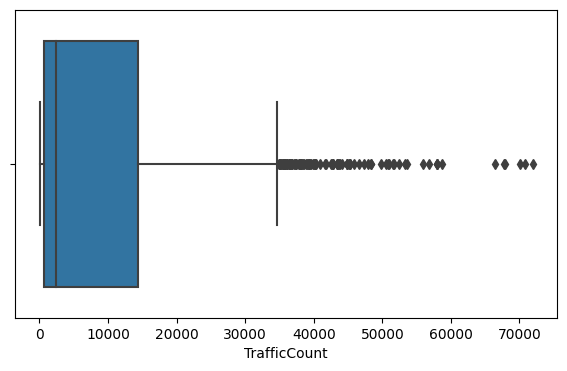

In [8]:
plt.figure(figsize=(7,4))
sns.boxplot(data=traffic, x='TrafficCount')

<Axes: xlabel='TrafficCount'>

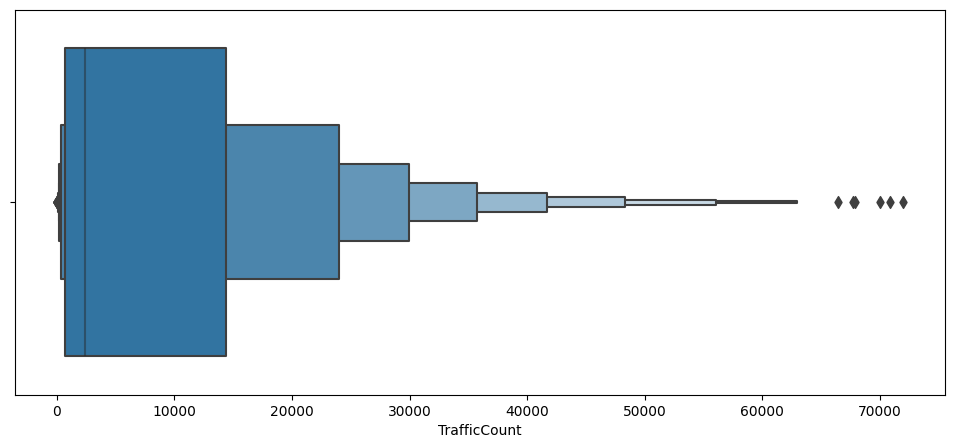

In [9]:
sns.boxenplot(data=traffic, x= 'TrafficCount')

### Modified Z score

In [10]:
# Function for calculating Modified Z-Scores to detect outliers in a DataFrame.
# Returns outliers and the modified DataFrame with 'm_zscore' values.
def modified_zscore(df, degree=3):
 data = df.copy()
 s = stats.norm.ppf(0.75)
 numerator = s*(data - data.median())
 MAD = np.abs(data - data.median()).median()
 data['m_zscore'] = numerator/MAD
 outliers = data[(data['m_zscore'] > degree) |
(data['m_zscore'] < -degree)]

 return outliers['TrafficCount'], data

In [11]:
# Apply modified_zscore with threshold to find outliers.
threshold = 3
outliers, transformed = modified_zscore(traffic, threshold)


array([[<Axes: title={'center': 'TrafficCount'}>,
        <Axes: title={'center': 'm_zscore'}>]], dtype=object)

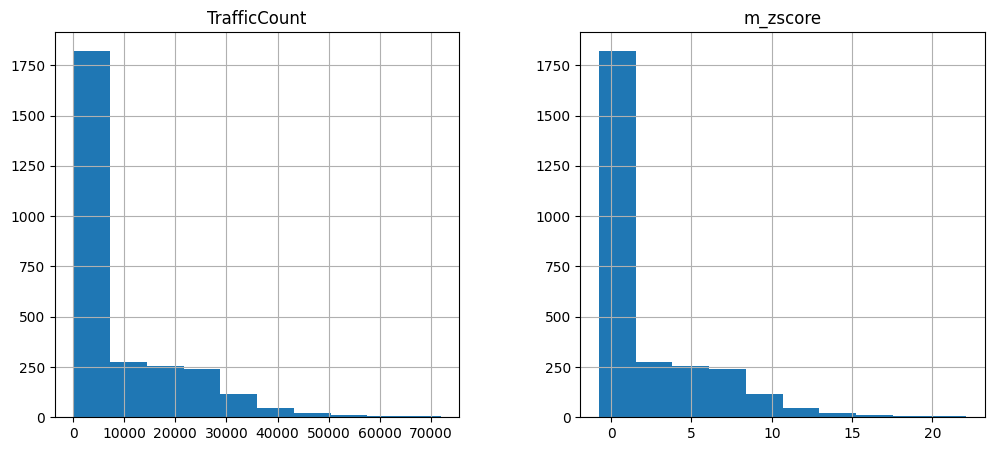

In [12]:
# Plot histogram of 'transformed' DataFrame.
transformed.hist()

In [13]:
# Printing outlers
print(outliers)

Timestamp
2020-01-21 09:30:00    16128.0
2020-01-21 10:30:00    24905.0
2020-01-21 11:30:00    34959.0
2020-01-21 12:30:00    28782.0
2020-01-21 13:30:00    30171.0
                        ...   
2020-05-15 15:30:00    25510.0
2020-05-15 16:30:00    22843.0
2020-05-15 17:30:00    23644.0
2020-05-15 18:30:00    17351.0
2020-05-15 19:30:00    14966.0
Name: TrafficCount, Length: 774, dtype: float64


In [14]:
# Function to plot data with outliers highlighted.
def plot_outliers(outliers, data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data, 'b-', label='Data')
    plt.plot(outliers, 'ro', label='Outliers')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

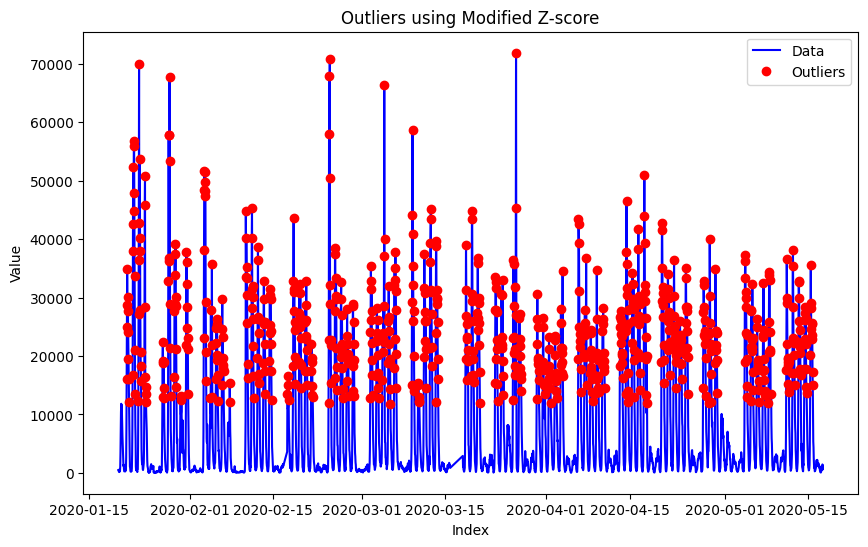

In [15]:
# Plot outliers on the traffic data with a specific title.
plot_outliers(outliers, traffic, "Outliers using Modified Z-score")


## Interquartile Range (IQR) Method


In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = traffic['TrafficCount'].quantile(0.25)
Q3 = traffic['TrafficCount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = traffic[(traffic['TrafficCount'] < lower_bound) | (traffic['TrafficCount'] > upper_bound)]
print(f'Identified outliers using IQR: {len(outliers)}')
print(outliers)

# Remove outliers
outliers_removed = traffic[(traffic['TrafficCount'] >= lower_bound) & (traffic['TrafficCount'] <= upper_bound)]
print(f'Non-outlier observations: {len(outliers_removed)}')
print(outliers_removed)

Identified outliers using IQR: 99
                     TrafficCount
Timestamp                        
2020-01-21 11:30:00       34959.0
2020-01-22 10:30:00       38016.0
2020-01-22 11:30:00       52405.0
2020-01-22 12:30:00       42522.0
2020-01-22 13:30:00       47863.0
...                           ...
2020-05-04 11:30:00       37331.0
2020-05-11 10:30:00       36527.0
2020-05-12 10:30:00       35484.0
2020-05-12 11:30:00       38140.0
2020-05-15 11:30:00       35623.0

[99 rows x 1 columns]
Non-outlier observations: 2694
                     TrafficCount
Timestamp                        
2020-01-20 00:00:00         487.0
2020-01-20 00:30:00         385.0
2020-01-20 01:30:00         269.0
2020-01-20 02:30:00         517.0
2020-01-20 03:30:00         129.0
...                           ...
2020-05-17 08:30:00         521.0
2020-05-17 09:30:00        1003.0
2020-05-17 10:30:00        1442.0
2020-05-17 11:30:00        1334.0
2020-05-17 12:30:00         632.0

[2694 rows x 1 columns]


In [19]:
outliers_removed.shape

(2694, 1)

<Axes: xlabel='TrafficCount'>

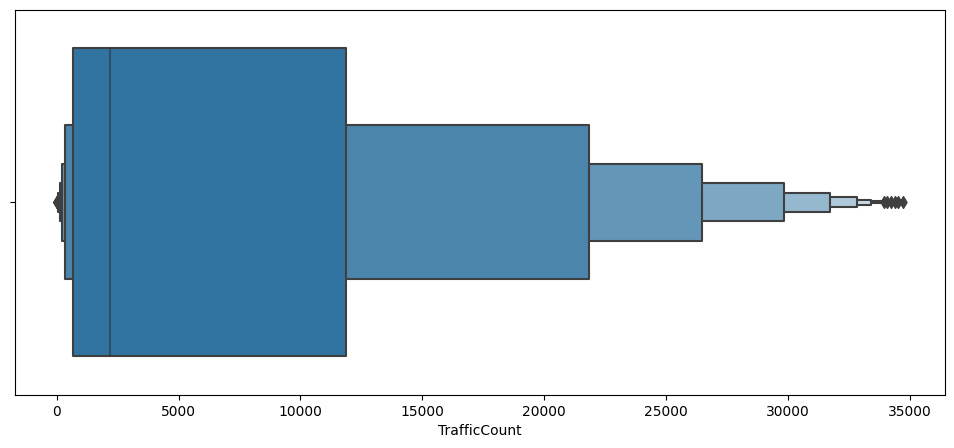

In [20]:
sns.boxenplot(data=outliers_removed, x= 'TrafficCount')

As shown by the boxplot extreme outlers have already been removed
***

In [21]:
# Rename outliers_removed to cleaned_traffic for clarity
cleaned_traffic = outliers_removed

# plot

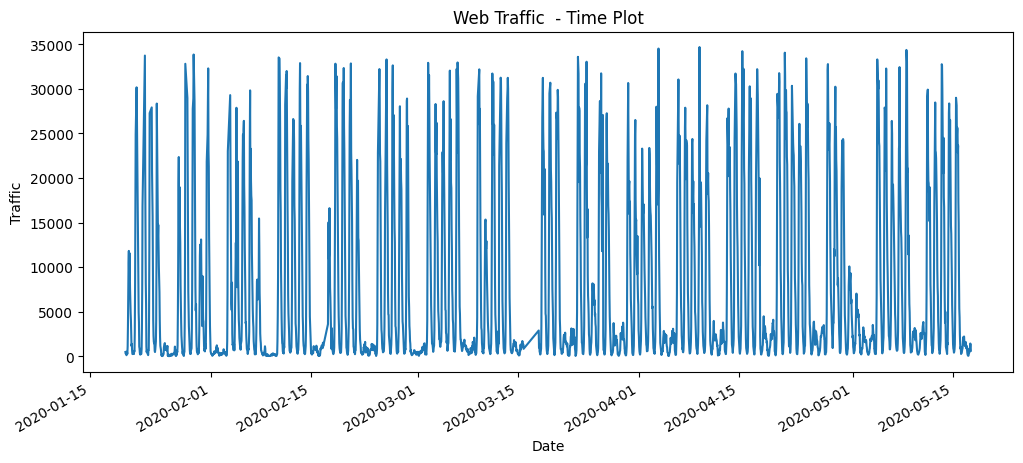

In [22]:
# Plotting time series
cleaned_traffic['TrafficCount'].plot(title='Web Traffic  - Time Plot')
plt.ylabel('Traffic')
plt.xlabel('Date')
plt.show()

In [23]:
# Extracting time-related features
cleaned_traffic.reset_index(inplace=True)
cleaned_traffic['week'] = cleaned_traffic['Timestamp'].dt.isocalendar().week
cleaned_traffic['hour'] = cleaned_traffic['Timestamp'].dt.hour
cleaned_traffic['day'] = cleaned_traffic['Timestamp'].dt.dayofweek
cleaned_traffic['day_str'] = cleaned_traffic['Timestamp'].dt.strftime('%a')
cleaned_traffic['year_month'] = cleaned_traffic['Timestamp'].dt.strftime('%Y_%m')
cleaned_traffic.set_index('Timestamp', inplace=True)

In [24]:
# Display the first few rows of the cleaned_traffic DataFrame.
cleaned_traffic.head()


,TrafficCount,week,hour,day,day_str,year_month
Timestamp,,,,,,
2020-01-20 00:00:00,487.0,4,0,0,Mon,2020_01
2020-01-20 00:30:00,385.0,4,0,0,Mon,2020_01
2020-01-20 01:30:00,269.0,4,1,0,Mon,2020_01
2020-01-20 02:30:00,517.0,4,2,0,Mon,2020_01
2020-01-20 03:30:00,129.0,4,3,0,Mon,2020_01


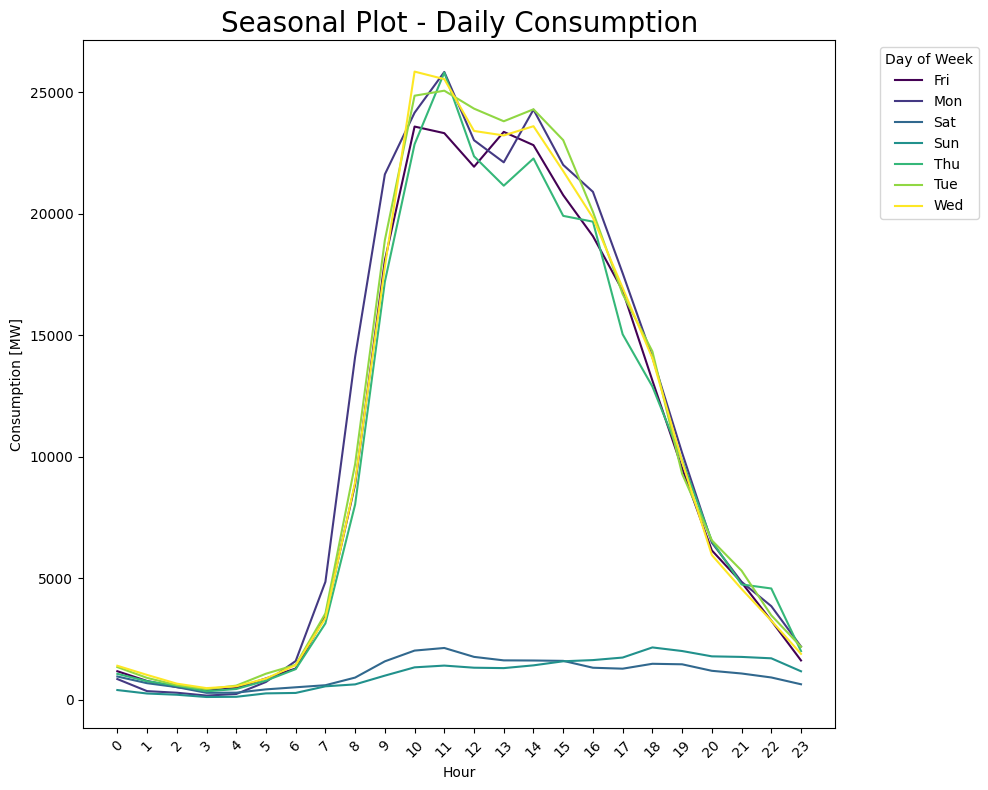

In [25]:
# Preparing the data
traffic_plot = cleaned_traffic[['hour', 'day_str', 'TrafficCount']].dropna()
traffic_plot = traffic_plot.groupby(['hour', 'day_str']).mean().reset_index()

# Plotting using Matplotlib directly
plt.figure(figsize=(10, 8))
days = traffic_plot['day_str'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(days)))

for i, day in enumerate(days):
    day_data = traffic_plot[traffic_plot['day_str'] == day]
    plt.plot(day_data['hour'], day_data['TrafficCount'], label=day, color=colors[i])

# Setting x-axis ticks
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)], rotation=45)

# Setting labels and titles
plt.title("Seasonal Plot - Daily Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Box Plots

### Total traffic


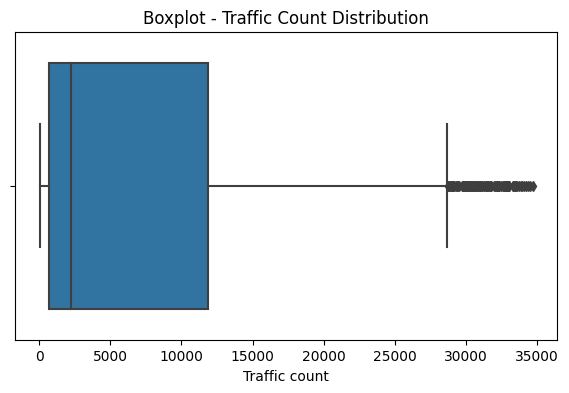

In [26]:
plt.figure(figsize=(7,4))
sns.boxplot(data=cleaned_traffic, x='TrafficCount')
plt.xlabel('Traffic count')
plt.title(f'Boxplot - Traffic Count Distribution');

### Day month distribution

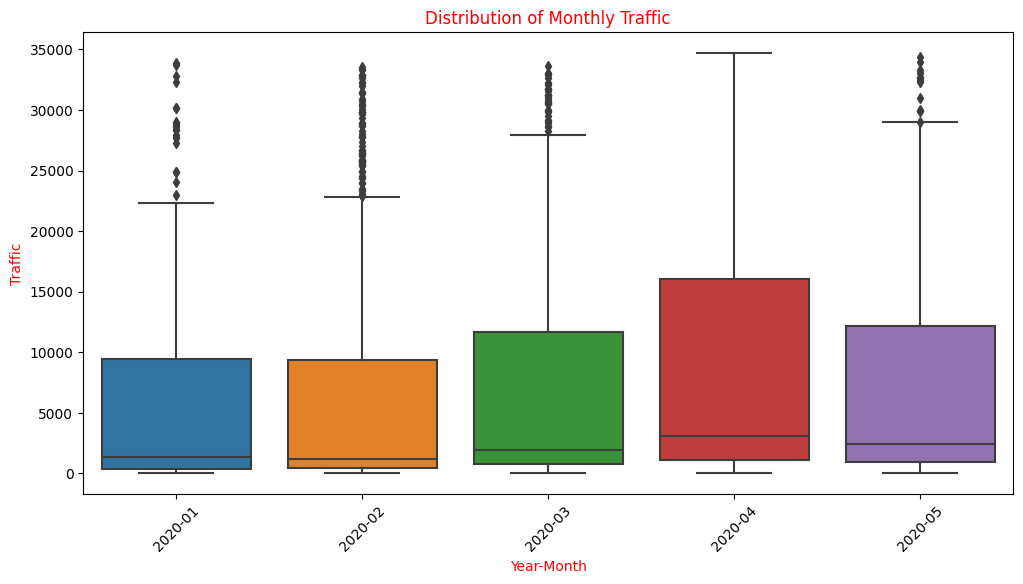

In [27]:
# Extracting year and month features
cleaned_traffic['year'] = cleaned_traffic.index.year
cleaned_traffic['month'] = cleaned_traffic.index.month
cleaned_traffic['year_month'] = cleaned_traffic.index.strftime('%Y-%m')
plt.figure(figsize=(12, 6))
# Plotting boxplot
sns.boxplot(x='year_month', y='TrafficCount', data=cleaned_traffic)
plt.title('Distribution of Monthly Traffic', color='red')
plt.xlabel('Year-Month', color ='red')
plt.ylabel('Traffic', color ='red')
plt.xticks(rotation=45)
plt.show()

### Day distribution

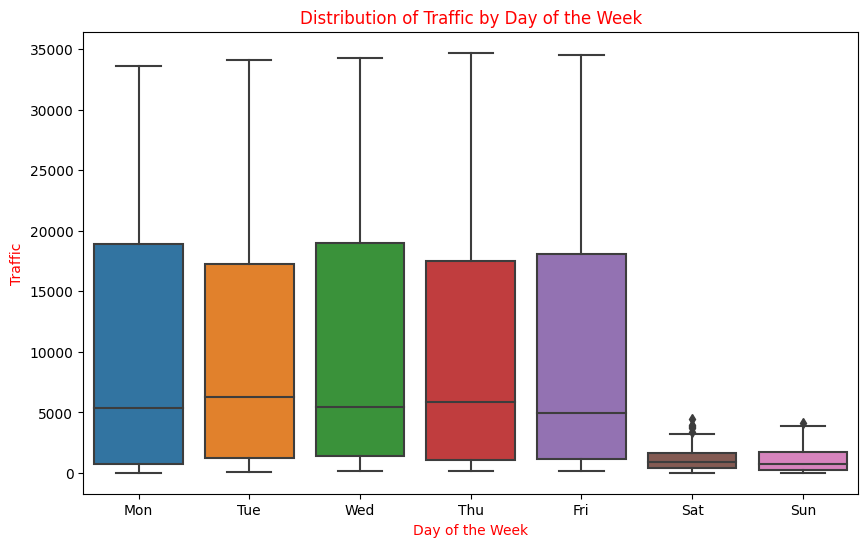

In [28]:

# Sorting the DataFrame by day of the week
traffic_plot = cleaned_traffic[['day_str', 'day', 'TrafficCount']].sort_values(by='day')

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_str', y='TrafficCount', data=traffic_plot)
plt.title('Distribution of Traffic by Day of the Week', color ='red')
plt.xlabel('Day of the Week', color ='red')
plt.ylabel('Traffic', color='red')
plt.show()

### Hour Distribution

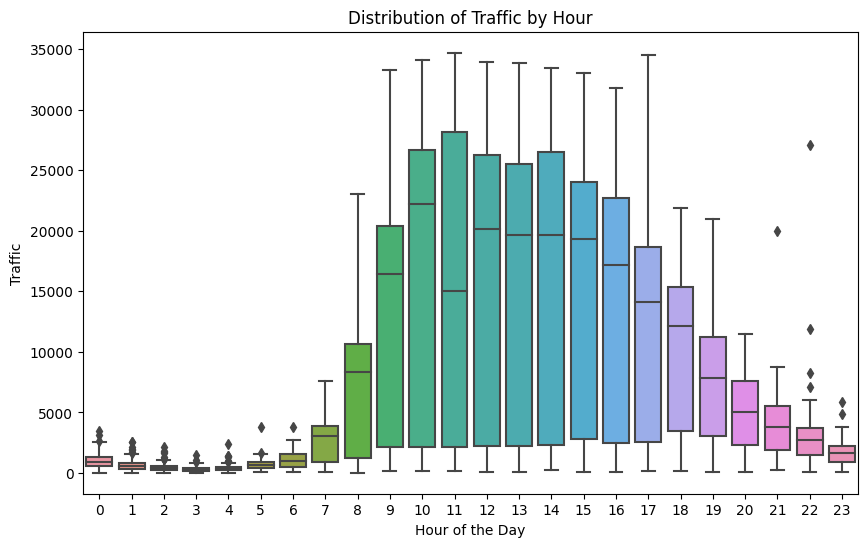

In [29]:
# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_traffic['hour'], y=cleaned_traffic['TrafficCount'])
plt.title('Distribution of Traffic by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic')
plt.show()